##### Agentchat API with assistant agent

In [39]:
import logging
from pydantic import BaseModel,Field
from autogen_core import CancellationToken

from autogen_core import EVENT_LOGGER_NAME

logging.basicConfig(level=logging.CRITICAL)
logger = logging.getLogger(EVENT_LOGGER_NAME)
logger.addHandler(logging.StreamHandler())
logger.setLevel(logging.CRITICAL)


In [36]:
from azure.identity import DefaultAzureCredential,get_bearer_token_provider
from autogen_ext.models.openai import AzureOpenAIChatCompletionClient
from autogen_agentchat.agents import AssistantAgent


# Create the token provider
token_provider = get_bearer_token_provider(
    DefaultAzureCredential(),
    "https://cognitiveservices.azure.com/.default",
)

az_model_client = AzureOpenAIChatCompletionClient(
    azure_deployment="gpt-4o-mini",
    model="gpt-4o-mini",
    api_version="2024-08-01-preview",
    azure_endpoint="https://azopenai-langchain.openai.azure.com/",
    azure_ad_token_provider=token_provider,  # Optional if you choose key-based authentication.
    # api_key="sk-...", # For key-based authentication.
)



agent = AssistantAgent("assitant_sir",az_model_client)
await agent.run(task="who are you ")


TaskResult(messages=[TextMessage(id='8f9ca447-87ca-4163-8c8f-787ed1e9f40c', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 13, 47, 107970, tzinfo=datetime.timezone.utc), content='who are you ', type='TextMessage'), TextMessage(id='82ab73ca-6ef5-429a-b99e-d885968a49bd', source='assitant_sir', models_usage=RequestUsage(prompt_tokens=40, completion_tokens=22), metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 14, 0, 45105, tzinfo=datetime.timezone.utc), content='I am an AI assistant here to help you with information and tasks. How can I assist you today?', type='TextMessage')], stop_reason=None)

In [41]:
response = await agent.run(task="What was the last question I asked?")
cancellation_token = CancellationToken()
await agent.on_reset(cancellation_token)
await agent.save_state()

{'type': 'AssistantAgentState',
 'version': '1.0.0',
 'llm_context': {'messages': []}}


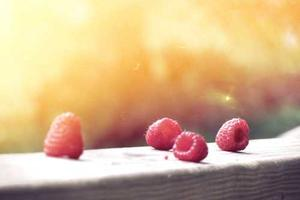

In [37]:
from io import BytesIO

import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image as AGImage
from PIL import Image

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/id/102/300/200").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
img


In [29]:

await agent.run(task=multi_modal_message)

TaskResult(messages=[MultiModalMessage(id='3ebfe67f-900b-4aac-86bf-5011aa308c02', source='User', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 5, 23, 340028, tzinfo=datetime.timezone.utc), content=['Can you describe the content of this image?', <autogen_core._image.Image object at 0x000001AA45B71150>], type='MultiModalMessage'), TextMessage(id='60be3984-2581-4c5d-b676-b4470668b60c', source='assitant_sir', models_usage=RequestUsage(prompt_tokens=17549, completion_tokens=72), metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 5, 42, 285940, tzinfo=datetime.timezone.utc), content="I can't see the image directly to describe it, but judging by your description, it likely features several raspberries placed on a surface, possibly with a warm or soft background, suggesting a natural or outdoor setting. The light might create an appealing atmosphere, enhancing the colors of the raspberries. If you provide more details or specific features, I can help further

In [33]:
class desc_model(BaseModel):
    imagetitle : str = Field(description="Image Title")
    description : str = Field(description="Desription about the image'")

In [38]:
agent_with_structuredoutput = AssistantAgent("assitant_sir",az_model_client,output_content_type=desc_model)
await agent_with_structuredoutput.run(task=multi_modal_message)

TaskResult(messages=[MultiModalMessage(id='ebe75d36-ac7b-4018-b749-64689730f5df', source='User', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 14, 1, 968482, tzinfo=datetime.timezone.utc), content=['Can you describe the content of this image?', <autogen_core._image.Image object at 0x000001AA47278850>], type='MultiModalMessage'), StructuredMessage[desc_model](id='ed4faafa-3f7e-43a2-a0a2-f6fcd89f3a39', source='assitant_sir', models_usage=RequestUsage(prompt_tokens=8611, completion_tokens=86), metadata={}, created_at=datetime.datetime(2025, 7, 6, 4, 14, 9, 648359, tzinfo=datetime.timezone.utc), content=desc_model(imagetitle='Fresh Raspberries on Wood', description='The image features several fresh raspberries placed on a weathered wooden surface, bathed in warm, soft light. The background is a blurred blend of hues that evoke a sunny day, enhancing the natural and inviting atmosphere. The raspberries, with their deep red color and textured surface, stand out 